### Нахождение корней нелинейного уравнения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy
# import sympy as sp
import pandas as pd

***

![Alt text](2023-10-20_13-10-46.png)

***

### Постановка задачи

<u>Цель</u>: найти корни системы
$\begin{cases}
    f_1(x, y) = 0
    \\
    f_2(x, y) = 0
\end{cases}$
с помощью метода Ньютона для решения систем нелинейных уравнений.

<u>Исходные данные</u>: f1(x, y), f2(x, y) - функции нелинейных уравнений

<u>Модельные представления</u>: у

<u>Критерий оценки результата</u>: $ ||F(x, y)|| \leq \epsilon $

($ \epsilon $ - заданная абсолютная погрешность вычислений)

***

1. Графически найти $ (x_0, y_0) $ - приближение к решению заданной системы уравнений 

$$\begin{cases}
    2x^2 - y = 1.544878
    \\
    \frac{x^2}{0.9} + 2y^2 = 4
\end{cases}$$

приведя её к виду 
$\begin{cases}
    f_1(x, y) = 0
    \\
    f_2(x, y) = 0
\end{cases}$

Приведём уравнения к виду f(x, y) = 0:

$$\begin{cases}
    f_1(x, y) = 2x^2 - y - 1.544878
    \\
    f_2(x, y) = \frac{x^2}{0.9} + 2y^2 - 4
\end{cases}$$

In [2]:
# Определение функций f1(x, y) и f2(x, y)
def f1(x, y):
    return 2*x**2 - y - 1.544878

def f2(x, y):
    return x**2/0.9 + 2*y**2 - 4

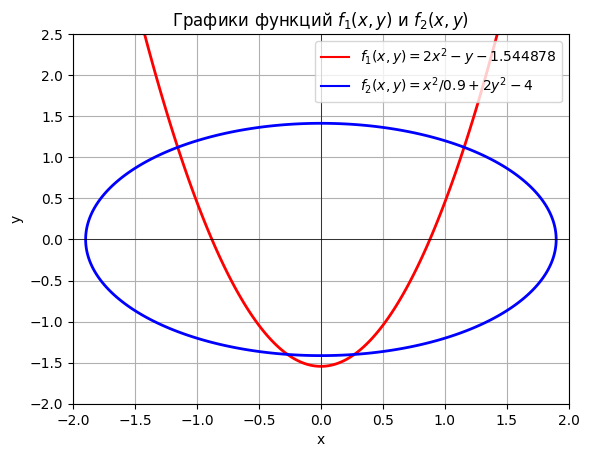

In [25]:
# Создание сетки значений x и y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2.5, 400)
X, Y = np.meshgrid(x, y)

# Вычисление значений f1 и f2 на сетке
F1 = f1(X, Y)
F2 = f2(X, Y)

# Построение графика функций f1(x, y) и f2(x, y)
plt.contour(X, Y, F1, levels=[0], colors='r', linewidths=2)
plt.contour(X, Y, F2, levels=[0], colors='b', linewidths=2)

# Добавление легенды
plt.plot([], [], 'r', label='$f_1(x, y) = 2x^2 - y - 1.544878$')
plt.plot([], [], 'b', label='$f_2(x, y) = x^2/0.9 + 2y^2 - 4$')


plt.title('Графики функций $f_1(x, y)$ и $f_2(x, y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

Обе функции являются симметричными относительно оси ординат. Значит, достаточно локализовать только два корня.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


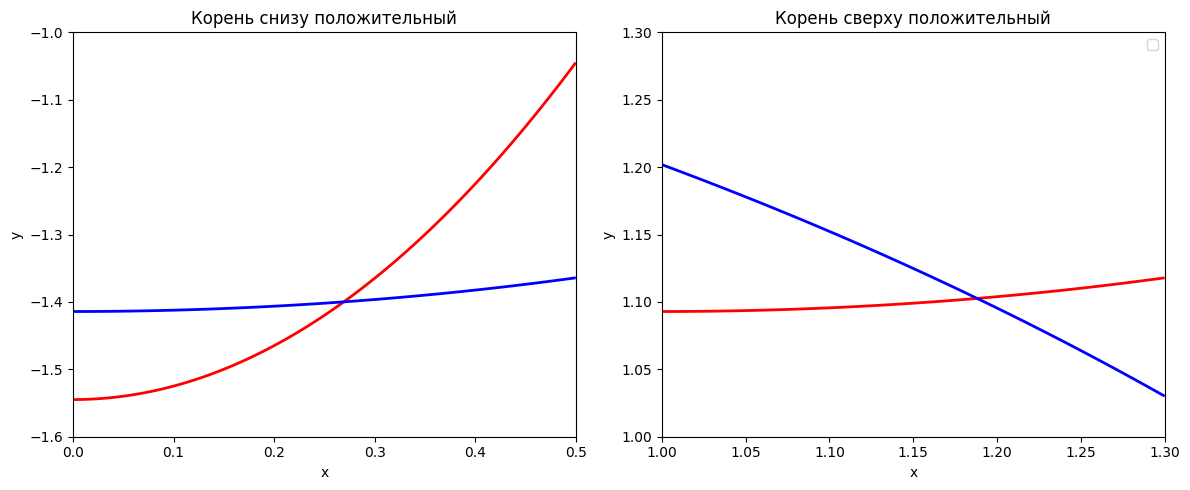

In [34]:
# Создание сетки значений x и y
x1 = np.linspace(0, 0.5, 400)
y1 = np.linspace(-1.6, -1, 400)

x2 = np.linspace(1, 1.3, 400)
y2 = np.linspace(1, 1.3, 400)

# Вычисление значений f1 и f2 на сетке
X1, Y1 = np.meshgrid(x1, y1)
X2, Y2 = np.meshgrid(x2, y2)

F11 = f1(X1, Y1)
F21 = f2(X1, Y1)

F12 = f1(X2, Y2)
F22 = f2(X2, Y2)

# Создание двух графиков рядом друг с другом
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Первый график (слева)
axs[0].contour(X1, Y1, F11, levels=[0], colors='r', linewidths=2)
axs[0].contour(X1, Y1, F21, levels=[0], colors='b', linewidths=2)
axs[0].set_title('Корень снизу положительный')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Второй график (справа)
axs[1].contour(X2, Y2, F21, levels=[0], colors='r', linewidths=2)
axs[1].contour(X2, Y2, F22, levels=[0], colors='b', linewidths=2)
axs[1].set_title('Корень сверху положительный')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.legend()
plt.tight_layout()
plt.show()

Приближённые значения корней системы уравнений: (-1.18, 1.11), (-0.27, -1.4), (0.27, -1.4), (1.18, 1.11).

***

2. Для вычисления значения решения с точностью $ 0.5 * 10^{-11} $ использовать упрощенный метод Ньютона. 

In [6]:
# Определение системы уравнений
def equations(vars):
    x, y = vars
    eq1 = 2 * x**2 - y - 1.544878
    eq2 = (x**2 / 0.9) + 2 * y**2 - 4
    return np.array([eq1, eq2])

# Определение производных
def jacobian(vars):
    x, y = vars
    df1_dx = 4 * x
    df1_dy = -1
    df2_dx = (2 * x) / 0.9
    df2_dy = 4 * y
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

# Упрощенный метод Ньютона
def newton_method(starting_point, epsilon):
    max_iterations = 100
    x, y = starting_point
    iteration = 1
    
    jacobian_matrix = jacobian([x, y])

    while iteration < max_iterations:
        f_values = equations([x, y])
        delta = np.linalg.solve(jacobian_matrix, f_values)
        x -= delta[0]
        y -= delta[1]

        if np.linalg.norm(delta) <= epsilon:
            return x, y, iteration
        iteration += 1

    return None  # Если не достигнута точность

In [3]:
# Параметры задачи
initial_guess = (0.27, -1.4)
epsilon = 0.5 * 1e-11

In [8]:
# Вызов метода Ньютона
result = newton_method(initial_guess, epsilon)

***

3. Напечатать значение вектор-функции $ \big( |f_1(x, y)|, |f_2(x, y)| \big) $ в точке полученного решения и число выполненных итераций. 

In [11]:
x_solution, y_solution, iterations = result
f_values = equations([x_solution, y_solution])
vector_function_values = (abs(f_values[0]), abs(f_values[1]))

print("Решение:")
print(f"x = {x_solution:.11f}, y = {y_solution:.11f}")
print("Число итераций:", iterations)
print("Значение вектор-функции |f(x, y)|:")
print(f"|f_1(x, y)| = {vector_function_values[0]}, |f_2(x, y)| = {vector_function_values[1]}")

Решение:
x = 0.26923474863, y = -1.39990330026
Число итераций: 5
Значение вектор-функции |f(x, y)|:
|f_1(x, y)| = 0.0, |f_2(x, y)| = 8.881784197001252e-16


***

## Контрольные вопросы:

1.	Укажите способ изменения расчетных формул метода Ньютона для решения систем нелинейных уравнений, чтобы избежать вычисление обратной матрицы Якоби на каждой итерации.

Стандартной формулой метода Ньютона для решения нелинейных уравнений является:

$$ x^{k+1} = x^k - [J(x^k)]^{-1} F(x^k), \ k=0,1,\dots $$

Для того, чтобы не считать каждый раз обратную матрицу Якоби, решают систему относительно неизвестных:

$$ \delta x^k = x^{k+1} - x^k \\ J(x^k) \delta x^k = -F(x^k) $$

То есть, переносят x влево, и домнажают слева на матрицу Якоби. Тогда справа при умножении матрицы на обратную получается единичная матрица и остаётся только $ -F(x^k) $

***

2.	Укажите аналог «упрощенного» метода Ньютона в случае решения систем нелинейных уравнений.

Упрощённый метод Ньютона для линейных уравнений высчитывает производную функции только для начального приближения и использует её во всех итерациях.

А при решении систем нелинейных уравнений упрощённый метод Ньютона на каждой итерации решает стационарную систему уравнений, где матрица Якоби находится только для начальных координат:

$$ J(x^0) \delta x^k = -F(x^k) $$

***

3.	Какие величины используются для замены производных в матрице Якоби в «разностном методе» для модификации метода Ньютона для решения систем нелинейных уравнений. 

В разностном методе для модификации метода Ньютона при решении систем нелинейных уравнений используются разностные аппроксимации производных. Вместо вычисления производных аналитически, как в классическом методе Ньютона, производные приближаются с использованием разностей.

Производные в матрице Якоби заменяются разностными соотношениями и решается на каждом шаге система:

$$ A(x^k) \delta x^k = -F(x^k) $$

$$ A(x^k) = \big( \frac{f_i (x_1^k, x_2^k, \dots, x_j^k + h_j^k, \dots, x_n^k)
- f_i (x_1^k, x_2^k, \dots, x_j^k, \dots, x_n^k)}{h_j^k} \big)_{i,j=1}^{n} $$

$A(x^k)$ - это приближённая матрица Якоби, которая в данном случае аппроксимируется на k-й итерации метода Ньютона.
n - количество переменных в системе. 

Формула аппроксимации матрицы Якоби оценивает ее элементы путем разностных вычислений. Элементы матрицы A вычисляются путем нахождения разности значений функции $f_i$ при небольших изменениях соответствующих переменных $x_j$. 

Функции $f_i(x_1, x_2, \ldots, x_j, \ldots, x_n)$: Это значения функций системы уравнений, вычисленные на текущем приближенном решении. Эти функции образуют вектор-функцию $F(x^k)$.

Шаги $h_j^k$ представляют собой небольшие приращения к переменным $x_j$, используемые для вычисления разностных отношений.

Используя разностные отношения, мы аппроксимируем значения производных в матрице Якоби, заменяя их на разности величин $f_i(x_1^k, x_2^k, \ldots, x_j^k + h_j^k, \ldots, x_n^k)$ и $f_i(x_1^k, x_2^k, \ldots, x_j^k, \ldots, x_n^k)$.